# Word Cloud

In [1]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from nltk.corpus import brown

In [ ]:
brown_text = ' '.join(brown.words(categories='mystery'))
brown_text[:100]



In [11]:
wc = WordCloud(max_font_size=40).generate(brown_text)
wc.to_file('output-wordcloud.png')

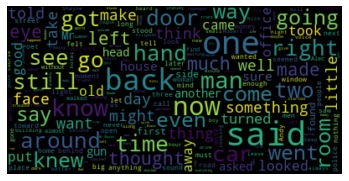

In [12]:
plt.imshow(wc,
          interpolation='bilinear')
plt.axis('off')
plt.show()